In [1]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data_train = pd.read_csv('dataset_8_features.csv')

In [3]:
data = data_train.copy()

In [4]:
data.head()

,Unnamed: 0,avg_dur,stddev_dur,min_dur,max_dur,srate,drate,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,attack
0,0,0.679473,0.544126,0.135347,1.223599,0.780467,0.468280,40,38,1
1,1,0.679572,0.544197,0.135375,1.223769,0.780536,0.468322,40,38,1
2,2,1.110847,1.110847,0.000000,2.221694,0.624899,0.900214,40,38,1
3,3,1.113328,1.113328,0.000000,2.226655,0.624931,0.898208,40,38,1
4,4,1.113098,1.113098,0.000000,2.226195,0.624954,0.898394,40,38,1


In [5]:
data_attack = data[data['attack'] == 1]

In [6]:
data_normal = data[data['attack'] == 0]

1    1926608
0        477
Name: attack, dtype: int64

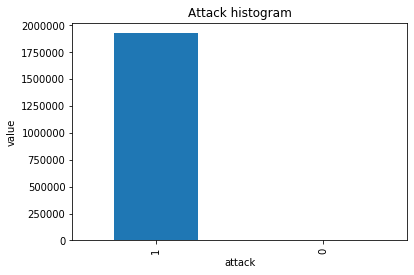

In [7]:
pd.value_counts(data['attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('value')
data['attack'].value_counts()

In [8]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label = 'ROC')
    plt.plot([0, 1], [0,1], color='red', linestyle='--')
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('Reciver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def classif_results():
  conf_mat = confusion_matrix(y_true=y_test , y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)
    
  labels= ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()
  
  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)
    
def test_scale():
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

In [9]:
X = data.iloc[:, data.columns != 'attack']
Y = data.iloc[:, data.columns == 'attack']
X, y = SMOTE(random_state=43).fit_resample(X, Y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
#logistic regression
test_scale()

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Confusion matrix:
 [[385583      0]
 [     2 385059]]


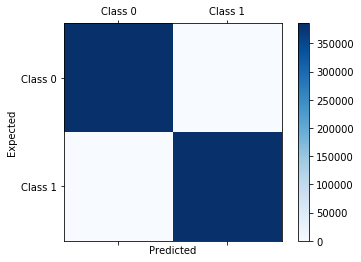

Accuracy 0.9999974047679603
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    385583
           1       1.00      1.00      1.00    385061

    accuracy                           1.00    770644
   macro avg       1.00      1.00      1.00    770644
weighted avg       1.00      1.00      1.00    770644

AUC Score: 
0.9999974030088739


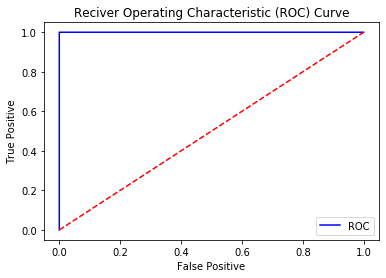

In [12]:
classif_results()

In [ ]:
#SVM
test_scale()

from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
classif_results()

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 3)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Epoch 1/3


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:770 train_step  *
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 15 but received input with shape (None, 8)


In [ ]:
classif_results()